Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

tweets <- filter(tweets, `AFRD & ECON_INSEC` == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-11 01:57:02,Jagmeet Singh,en,"The stories we heard tonight in London made it clear to me that whether it's expanding health care or fixing the housing crisis, people need a government that's actually in it for them. No more catering to big corporations or the ultra-rich – we need to put people first. #elxn43 https://t.co/216tatEEhN",1,1,0,0,0
2019-09-11 17:10:48,Andrew Scheer,en,It’s time for you to get ahead! And I’m launching our campaign for a new Conservative government that lives within its means and puts more money in your pocket so you can get ahead. WATCH: https://t.co/7RL8fG4EKO,0,1,0,0,0
2019-09-11 18:39:58,Andrew Scheer,en,"A new Conservative government will take immediate action to put more money in your pocket so you can get ahead. We’re going to make maternity benefits tax-free, cancel the Trudeau carbon tax, and take the GST off home heating costs. https://t.co/eOg1H72RUL",0,1,0,0,1
2019-09-12 14:21:38,Justin Trudeau,en,"For a lot of hardworking Canadians, buying a house right now seems impossible. That’s why we created the First-Time Home Buyer Incentive - and why we’ll keep working together to help make home ownership a reality for your family. https://t.co/hH2gj98KSk",0,1,0,0,0
2019-09-12 15:11:33,Jagmeet Singh,en,Liberal &amp; Conservative governments have both played a role in creating the wait times &amp; hallway medicine crisis we see here in Brampton. That's why today the NDP committed to supporting the construction of a new Brampton hospital so families get the care they deserve. #elxn43 https://t.co/wdaslHuxE2,0,1,0,0,0
2019-09-12 15:38:47,Andrew Scheer,en,Parenting is tough enough without government making life harder and more expensive. It’s time for you to get ahead. Pleased to share with parents in #NorthYork our plan to make parental #EI benefits tax-free. https://t.co/n6ilq3wMs8,0,1,0,0,0


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to lowercase
tweets.tokens <- tokens_tolower(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, stopwords(), selection = "remove")

#stem
tweets.tokens <- tokens_wordstem(tweets.tokens, language = "english")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

#tfidf
tweets.tokens.tfidf <- dfm_tfidf(tweets.tokens.dfm)

In [5]:
#more data cleaning...
tweets.tokens.df_tfidf <- cbind(Label = tweets$leader, Label = tweets$date, as.data.frame(tweets.tokens.tfidf))

tweets.tokens.tfidf.df <- cbind(data.frame(tweets.tokens.df_tfidf))

names(tweets.tokens.tfidf.df) <- make.names(names(tweets.tokens.tfidf.df))

tweets.tokens.tfidf.df <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("document"))]

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”

PCA and Visualisation

In [6]:
numeric <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("Label", "Label.1"))]

In [7]:
pca <- prcomp(numeric)

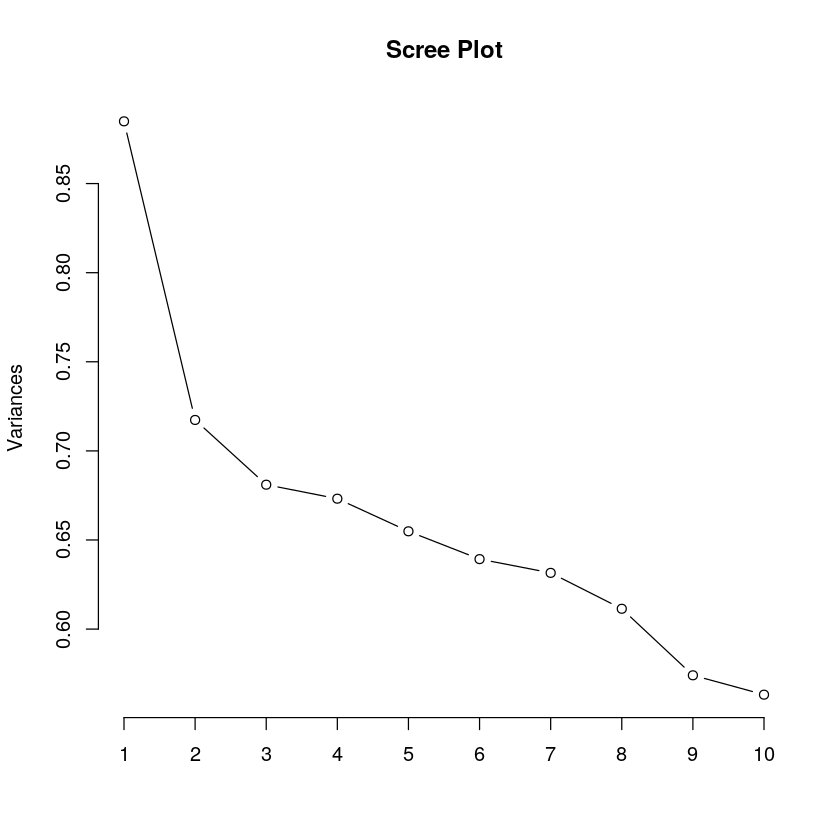

In [8]:
screeplot(pca, type='l', npcs=10, main="Scree Plot")

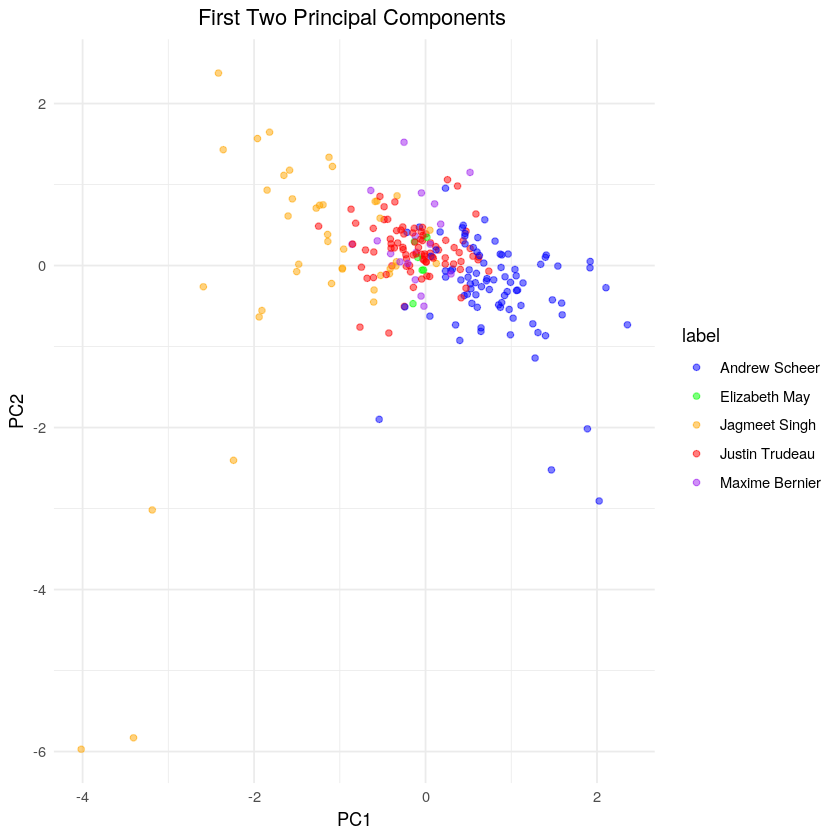

In [9]:
pca$x[,1:2] %>%
    as.data.frame() %>%
    mutate(label = factor(tweets.tokens.tfidf.df$Label)) %>%
    ggplot(aes(PC1, PC2, colour = label)) +
    geom_point(alpha = 0.5) +
    ggtitle("\t\t\tFirst Two Principal Components") +
    theme_minimal() +
    scale_color_manual(values=c("blue","green","orange","red","purple"))